<a href="https://colab.research.google.com/github/saksham926/100-Days-of-Ml-Code/blob/master/classification%20of%20clothes%20using%20cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import tensorflow as tf

In [56]:
from keras.datasets import fashion_mnist

In [57]:
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

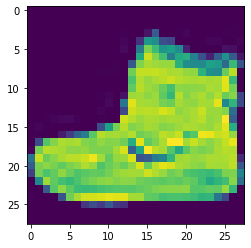

In [58]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [59]:
y_train[0]

9

In [60]:
class_name=['T-shirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

In [61]:
class_name[y_train[0]]

'ankle boot'

In [62]:
x_train[0].shape

(28, 28)

In [63]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

Data Normalisation<br>

Now we will normalize the data dimension so that they are approximately of the same scale

In [64]:
x_train=x_train/255.0
x_test=x_test/255.0

Splitting the dataset into training,validation and testing dataset<br>
1.Training data- Used for training the model <br>
2.Validation data- Used for tuning the hyperparameters<br>
3.Test data- Used for testing the data 


In [65]:
x_valid,x_train=x_train[:5000],x_train[5000:]
y_valid,y_train=y_train[:5000],y_train[5000:]


In [66]:
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [67]:
import numpy as np
np.random.seed(42)
tf.random.set_seed(42)

In [68]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))


In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


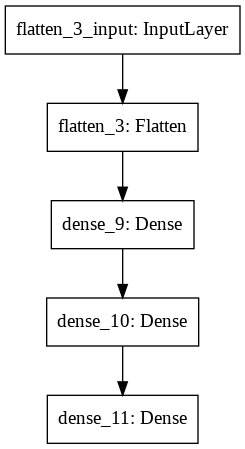

In [70]:
import pydot
tf.keras.utils.plot_model(model)

In [71]:
model.compile(optimizer='sgd',metrics=['accuracy'],loss='sparse_categorical_crossentropy')

In [72]:
model_history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8458 - val_loss: 0.5304 - val_accuracy: 0.7996
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4123 - accuracy: 0.8566 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3939 - accuracy: 0.8622 - val_loss: 0.3745 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3752 - accuracy: 0.8675 - val_loss: 0.3718 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3631 - accuracy: 0.8716 - val_loss: 0.3616 - val_accuracy:

In [74]:
model_history.history

{'accuracy': [0.7643091082572937,
  0.831781804561615,
  0.8457818031311035,
  0.8565636277198792,
  0.8622363805770874,
  0.8675454258918762,
  0.8715817928314209,
  0.8747454285621643,
  0.8793454766273499,
  0.8820545673370361,
  0.8839091062545776,
  0.8865454792976379,
  0.8896363377571106,
  0.8916545510292053,
  0.8939999938011169,
  0.8971454501152039,
  0.8979091048240662,
  0.9006181955337524,
  0.902363657951355,
  0.9035817980766296,
  0.9055818319320679,
  0.9071454405784607,
  0.9085999727249146,
  0.9103817939758301,
  0.9126545190811157,
  0.9137818217277527,
  0.9155091047286987,
  0.9166181683540344,
  0.9180545210838318,
  0.9203454256057739],
 'loss': [0.7237027883529663,
  0.484192818403244,
  0.4390644133090973,
  0.41230905055999756,
  0.39393678307533264,
  0.37517988681793213,
  0.3631107211112976,
  0.3514234721660614,
  0.34116992354393005,
  0.3316737115383148,
  0.32377755641937256,
  0.31472039222717285,
  0.3077256381511688,
  0.30191129446029663,
  0.294

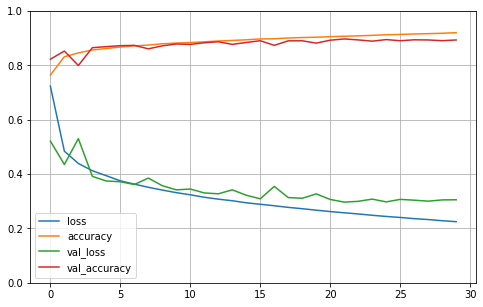

In [75]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()